In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.LabeledImageDataset import LabeledImageDataset
from models.resnet import Resnet50Model, Resnet18Model
from train import train_classifier
from utils import plot_model_metrics, oversample_dataset
from utils import reduce_dataset, split_dataset, undersample_dataset
from torchvision.transforms import v2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = LabeledImageDataset("data/candidates")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.7)
train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = Resnet18Model(hidden_layers=3, units_per_layer=2048, dropout=0.2,focal_alpha=0.02)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
Dataset: 1,362 training, 6,069 testing


In [2]:
print(model)

Resnet18Model(
  (pretrained_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-01-25T22:13:26.495329


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        learning_rate=0.0001,
                                        max_epochs=20,
                                        checkpoint_every=1,
                                        eval_every=1)


Epoch 1 training: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


Train: 1/20: loss:0.0033191219748308263


Epoch 1 testing: 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


Test: 1/20: loss:0.002749772092405086, accuracy:0.8931707167932781, precision:0.24562737073641147, recall:0.5940143836283542, f1:0.34106719042665773, mcc:0.33180850150392954, epoch:0


Epoch 2 training: 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]


Train: 2/20: loss:0.0026775030807281532


Epoch 2 testing: 100%|██████████| 24/24 [00:14<00:00,  1.71it/s]


Test: 2/20: loss:0.0029346863254128643, accuracy:0.7017177068945673, precision:0.12870642615875452, recall:0.9097707525532602, f1:0.22447130162610499, mcc:0.2690726094317812, epoch:1


Epoch 3 training: 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]


Train: 3/20: loss:0.0020445840200409293


Epoch 3 testing: 100%|██████████| 24/24 [00:14<00:00,  1.69it/s]


Test: 3/20: loss:0.0033862165485819182, accuracy:0.7204630309046962, precision:0.137305352053883, recall:0.9178524473319364, f1:0.23646795411219013, mcc:0.284426693129112, epoch:2


Epoch 4 training: 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]


Train: 4/20: loss:0.0019325471754806738


Epoch 4 testing: 100%|██████████| 24/24 [00:14<00:00,  1.70it/s]


Test: 4/20: loss:0.004139740446892877, accuracy:0.6947190089779006, precision:0.12948571258236755, recall:0.944897504456328, f1:0.22639920008169487, mcc:0.2781944665495741, epoch:3


Epoch 5 training: 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]


Train: 5/20: loss:0.002062482584733516


Epoch 5 testing: 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]


Test: 5/20: loss:0.0026976079388987273, accuracy:0.7668218735612339, precision:0.16033374438686213, recall:0.9155172611974082, f1:0.27044773111356923, mcc:0.32057304504076406, epoch:4


Epoch 6 training: 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


Train: 6/20: loss:0.001766405999660492


Epoch 6 testing: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s]


Test: 6/20: loss:0.0020833610421201834, accuracy:0.8061379560888581, precision:0.18392049419633197, recall:0.8677827959077961, f1:0.30133097625515526, mcc:0.3412121078045902, epoch:5


Epoch 7 training: 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]


Train: 7/20: loss:0.0016776150247702997


Epoch 7 testing: 100%|██████████| 24/24 [00:15<00:00,  1.57it/s]


Test: 7/20: loss:0.002804091287543997, accuracy:0.7582351375460404, precision:0.1580966290763948, recall:0.9325903501454972, f1:0.26827204891004913, mcc:0.3211804945717804, epoch:6


Epoch 8 training: 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]


Train: 8/20: loss:0.002003898514279475


Epoch 8 testing:  58%|█████▊    | 14/24 [00:09<00:06,  1.54it/s]

KeyboardInterrupt



Training ends 2025-01-25T22:04:29.061718
Test accuracy: 0.6559190837937385
Test precision: 0.12052858426399389
Test recall: 0.9749257754772461
Test f1: 0.21359263918237512
Test mcc: 0.26851813714573297


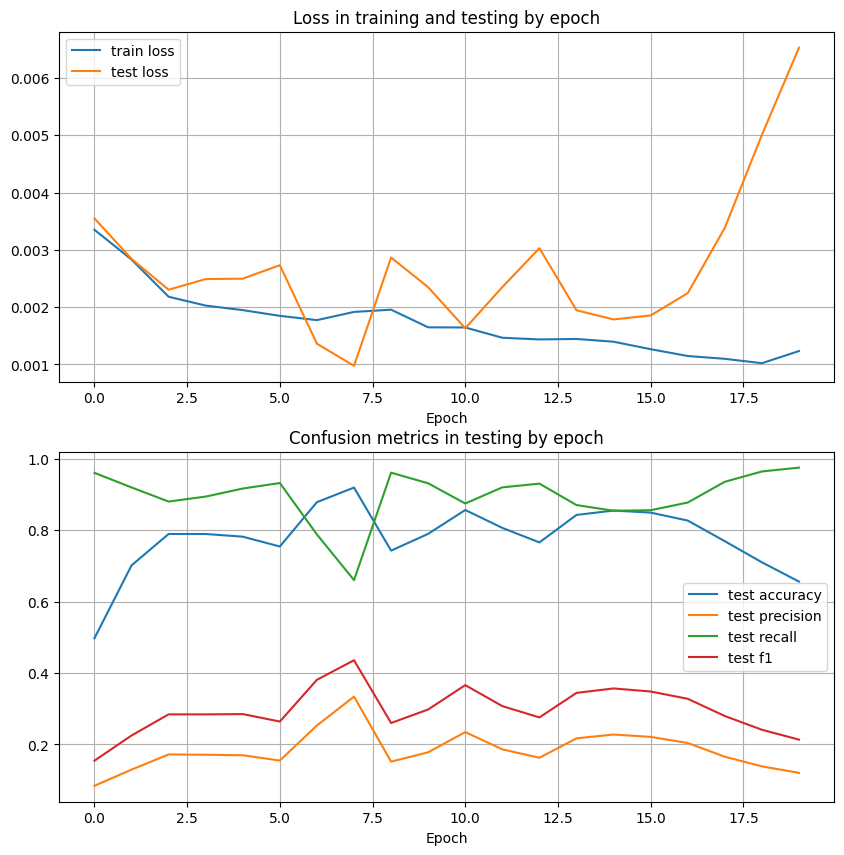

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pickle")